In [ ]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [2]:
# STEP 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
import os


In [3]:
# STEP 2: Setup paths and parameters
dataset_path = '/content/drive/MyDrive/Object_dataset'
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 15


In [4]:
# STEP 3: Data Augmentation and Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 749 images belonging to 5 classes.
Found 185 images belonging to 5 classes.


In [5]:
# STEP 4: Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze base model


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# STEP 5: Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)  # 5 classes

model = Model(inputs=base_model.input, outputs=predictions)


In [7]:
# STEP 6: Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# STEP 7: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 411s 17s/step - accuracy: 0.4430 - loss: 1.5041 - val_accuracy: 0.8108 - val_loss: 0.6117
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7754 - loss: 0.6213 - val_accuracy: 0.8865 - val_loss: 0.3664
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8438 - loss: 0.4115 - val_accuracy: 0.8919 - val_loss: 0.3180
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8802 - loss: 0.3526 - val_accuracy: 0.9081 - val_loss: 0.2934
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 973ms/step - accuracy: 0.9106 - loss: 0.2735 - val_accuracy: 0.8703 - val_loss: 0.3000
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8996 - loss: 0.2631 - val_accuracy: 0.9135 - val_loss: 0.2528
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9306 - loss: 0.1888 - val_accuracy: 0.8973 - val_loss: 0.2535
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9323 - loss: 0.2029 - val_accuracy: 0.8865 - val_

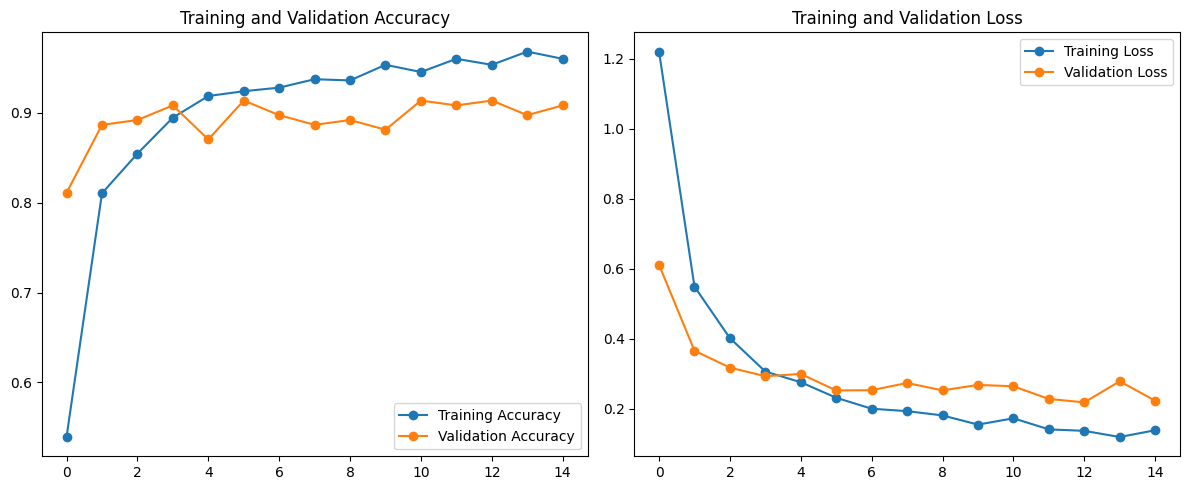

In [9]:
# STEP 8: Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


In [10]:
model.save('mobilenetv2_object_classifier.h5')
